# Dacon 경진대회 - 주식 종료 가격 예측 경진대회
1.주제



KOSPI-200과 KOSDAQ-150의 주어진 기간에 마지막으로 거래된 가격(종가)를 예측하는 경진대회입니다.





2.대회 배경



코로나19 대유행으로 변동성이 높아져 주식 투자에 관심이 많습니다.



주식시장이 급락했던 3월 주식거래 활동계좌1)는 3천만 계좌를 돌파했고2), 올해 6월까지(6/24 기준) 약 275만 개의 활동계좌가 늘어나 2009년 이후 신규 투자자가 가장 많이 유입됐다. 

또한 국내 상위 검색포털의 주식시장 관련 검색이 급격하게 늘어나는 등 사람들 사이에서 주식투자가 유행하고 있는 것으로 보인다. (<그림 1> 참고)

![img](3Oauh6z6QkbjO7yXtTXT.png)
"코로나19 위기와 최근 주식투자 수요 증가에 대한 소고" 자본시장연구원 자료



국립중앙도서관에서 발표한 3년간 금융 관련 도서 대출 현황에 의하면 2018년 상위 50위 도서 중 6권이 주식관련 도서였습니다.

COVID-19 이후에는 14권으로, 2배 이상 증가했습니다.

(국립중앙도서관, “공공도서관 금융 관련 도서 대출 현황 결과 발표”, 2021-04-23)



또한 최근 암호화폐 시장에서 다시 국내 주식 시장으로 모이는 분위기라고 합니다.

(강창욱, “코인에서 주식시장으로 투자자 돈 다시 몰린다”, 국민일보, 2021-06-07)



이런 상황 속에서, 주식의 종료 가격을 정확하게 예측할 수 있다면 어떨까요?

지금까지 실행된 다양한 시계열 대회를 참고해 자신만의 모델을 만들어 보세요!





3. 주최 / 주관



주최 : 국토교통부, 전라북도, 전북창조경제혁신센터

주관 : DACON





4. 참가 대상



금융 데이터 교육 및 매매프로그램 개발에 관심있는 학생 및 일반인

5. **평가**
    * 평가 산식: NMAE * 100


    * 평가 (Public, Private score)
        public score: 11월 1일 ~ 11월 5일 주식 종료 예측값
        private score: 11월 29일 ~ 12월 3일 주식 종료 예측값


    * 코드평가 / 서면평가
        코드평가: private score 재현 평가 (60%)
        서면평가: 제출한 pdf파일을 다음과 같은 기준에 따라 평가 (40%)


A. 적합성(30%): 구현 알고리즘/결과에 대한 해석

B. 논리성(30%): 구현 알고리즘에 대한 논리성

C. 안정성(20%): 알고리즘을 다른 test dataset에 적용했을 때 결과의 일관적인 안정성

D. 완결성(20%): 제출한 자료가 성의 있고 구성이 짜임새 있는지

* source : https://dacon.io/competitions/official/235857/overview/description

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [1]:
import FinanceDataReader as fdr

In [10]:
sk = fdr.DataReader('000660')
sk

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-10-31,221228,232872,206091,232871,127520,NaN
1997-11-01,227050,251501,227050,251501,46860,0.080001
1997-11-03,251501,271296,232872,271295,165920,0.078703
1997-11-04,274789,292254,271296,292254,192760,0.077255
1997-11-05,308555,315541,296911,308555,241590,0.055777
...,...,...,...,...,...,...
2021-11-25,120500,121000,117000,117500,3339835,-0.016736
2021-11-26,116500,118500,113000,115500,4337936,-0.017021
2021-11-29,113000,118500,113000,116000,4412863,0.004329


In [5]:
sk.index

DatetimeIndex(['1997-10-31', '1997-11-01', '1997-11-03', '1997-11-04',
               '1997-11-05', '1997-11-06', '1997-11-07', '1997-11-08',
               '1997-11-10', '1997-11-11',
               ...
               '2021-11-18', '2021-11-19', '2021-11-22', '2021-11-23',
               '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-29',
               '2021-11-30', '2021-12-01'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

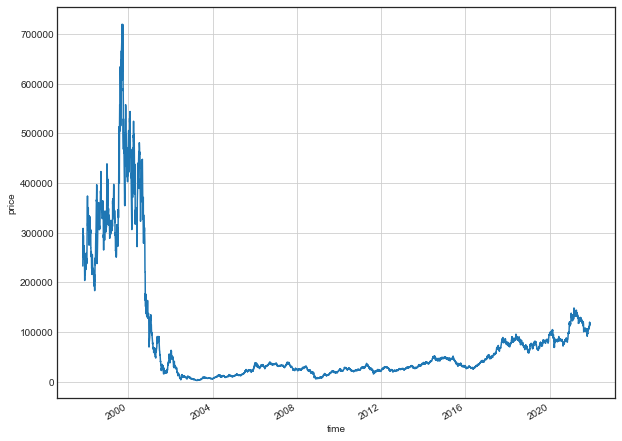

In [9]:
plt.figure(figsize = (10, 8))

sk['Close'].plot()
plt.xlabel('time')
plt.ylabel('price')
plt.grid()

In [14]:
sk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6000 entries, 1997-10-31 to 2021-12-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6000 non-null   int64  
 1   High    6000 non-null   int64  
 2   Low     6000 non-null   int64  
 3   Close   6000 non-null   int64  
 4   Volume  6000 non-null   int64  
 5   Change  5999 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 328.1 KB


In [17]:
sk.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Change    1
dtype: int64

In [20]:
sk = sk.dropna()

In [23]:
sk

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-11-01,227050,251501,227050,251501,46860,0.080001
1997-11-03,251501,271296,232872,271295,165920,0.078703
1997-11-04,274789,292254,271296,292254,192760,0.077255
1997-11-05,308555,315541,296911,308555,241590,0.055777
1997-11-06,306226,312048,291090,302733,153190,-0.018869
...,...,...,...,...,...,...
2021-11-25,120500,121000,117000,117500,3339835,-0.016736
2021-11-26,116500,118500,113000,115500,4337936,-0.017021
2021-11-29,113000,118500,113000,116000,4412863,0.004329


In [26]:
scale = MinMaxScaler()

sk_scale = scale.fit_transform(sk)
df_sk_scale = pd.DataFrame(sk_scale, columns = ('Open', 'High', 'Low', 'Close', 'Volume', 'Change'))
df_sk_scale.index = sk.index
df_sk_scale

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-11-01,0.298463,0.324096,0.315792,0.347389,0.000026,0.766450
1997-11-03,0.330984,0.349877,0.323978,0.375021,0.000091,0.762125
1997-11-04,0.361958,0.377172,0.378003,0.404279,0.000105,0.757300
1997-11-05,0.406869,0.407500,0.414019,0.427035,0.000132,0.685731
1997-11-06,0.403771,0.402951,0.405835,0.418908,0.000084,0.437003
...,...,...,...,...,...,...
2021-11-25,0.156746,0.154136,0.161057,0.160328,0.001822,0.444108
2021-11-26,0.151426,0.150880,0.155432,0.157536,0.002367,0.443158
2021-11-29,0.146771,0.150880,0.155432,0.158234,0.002408,0.514300


In [29]:
high_prices = df_sk_scale['High'].values
low_prices = df_sk_scale['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [30]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [32]:
def normalize_windows(df_sk_scale):
    normalized_data = []
    for window in df_sk_scale:
        normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalized_data.append(normalized_window)
    return np.array(normalized_data)

result = normalize_windows(result)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((5353, 50, 1), (595, 50, 1))

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SimpleRNN, GRU, RNN, Conv1D

import datetime

In [36]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (50, 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mse',
             optimizer = 'rmsprop',
             metrics = ['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(x_train, y_train, 
         epochs = 20,
         batch_size = 10,
         validation_data = (x_test, y_test))

Epoch 1/20
536/536 [==============================] - 9s 10ms/step - loss: 1.2433 - mae: 0.1286 - val_loss: 0.0015 - val_mae: 0.0290
Epoch 2/20
536/536 [==============================] - 5s 8ms/step - loss: 0.7890 - mae: 0.0948 - val_loss: 0.0012 - val_mae: 0.0261
Epoch 3/20
536/536 [==============================] - 4s 8ms/step - loss: 0.6086 - mae: 0.0820 - val_loss: 7.5900e-04 - val_mae: 0.0205
Epoch 4/20
536/536 [==============================] - 4s 8ms/step - loss: 0.5464 - mae: 0.0747 - val_loss: 5.9741e-04 - val_mae: 0.0181
Epoch 5/20
536/536 [==============================] - 5s 9ms/step - loss: 0.4125 - mae: 0.0660 - val_loss: 7.5921e-04 - val_mae: 0.0199
Epoch 6/20
536/536 [==============================] - 5s 9ms/step - loss: 0.2971 - mae: 0.0615 - val_loss: 4.9481e-04 - val_mae: 0.0167
Epoch 7/20
536/536 [==============================] - 5s 9ms/step - loss: 0.2324 - mae: 0.0540 - val_loss: 5.7800e-04 - val_mae: 0.0186
Epoch 8/20
536/536 [==============================] - 5

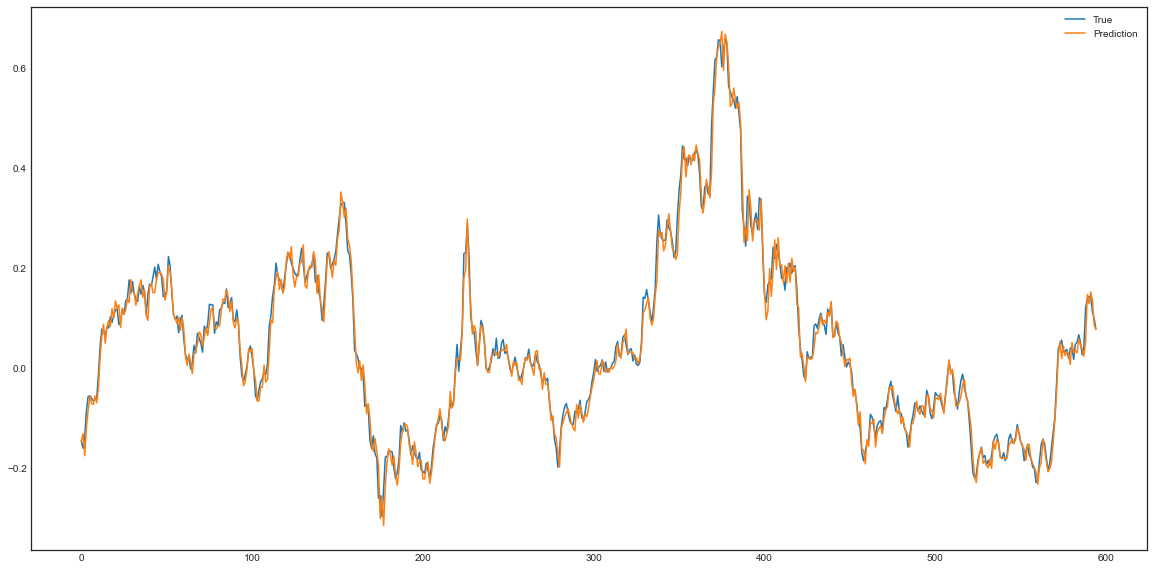

In [38]:
pred = model.predict(x_test)

fig = plt.figure(facecolor = 'white', figsize = (20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label = 'True')
ax.plot(pred, label = 'Prediction')
ax.legend()
plt.show()

## 

In [39]:
df_sk_scale

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-11-01,0.298463,0.324096,0.315792,0.347389,0.000026,0.766450
1997-11-03,0.330984,0.349877,0.323978,0.375021,0.000091,0.762125
1997-11-04,0.361958,0.377172,0.378003,0.404279,0.000105,0.757300
1997-11-05,0.406869,0.407500,0.414019,0.427035,0.000132,0.685731
1997-11-06,0.403771,0.402951,0.405835,0.418908,0.000084,0.437003
...,...,...,...,...,...,...
2021-11-25,0.156746,0.154136,0.161057,0.160328,0.001822,0.444108
2021-11-26,0.151426,0.150880,0.155432,0.157536,0.002367,0.443158
2021-11-29,0.146771,0.150880,0.155432,0.158234,0.002408,0.514300


In [45]:
# train / test split
# test_size = .2

x_train, x_test, y_train, y_test = train_test_split(df_sk_scale[['Open', 'High', 'Low', 'Volume', 'Change']], 
                                                    df_sk_scale[['Close']], 
                                                    test_size = .2, 
                                                    random_state = 0, 
                                                    shuffle = False)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4799, 5) (4799, 1)
(1200, 5) (1200, 1)


In [50]:
x_train = x_train.values
y_train = y_train.values

x_test = x_test.values
y_test = y_test.values

In [52]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4799, 5) (4799, 1)
(1200, 5) (1200, 1)


In [56]:
# Model

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (5, 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mse',
             optimizer = 'rmsprop',
             metrics = ['mae'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 50)             10400     
                                                                 
 lstm_5 (LSTM)               (None, 64)                29440     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [57]:
hist = model.fit(x_train, y_train,
                 epochs = 20,
                 batch_size = 10,
                validation_data = (x_test, y_test))

Epoch 1/20
480/480 [==============================] - 5s 7ms/step - loss: 0.0011 - mae: 0.0179 - val_loss: 2.3562e-05 - val_mae: 0.0047
Epoch 2/20
480/480 [==============================] - 3s 6ms/step - loss: 3.1772e-04 - mae: 0.0113 - val_loss: 2.0398e-05 - val_mae: 0.0041
Epoch 3/20
480/480 [==============================] - 3s 6ms/step - loss: 2.5786e-04 - mae: 0.0104 - val_loss: 1.3623e-05 - val_mae: 0.0032
Epoch 4/20
480/480 [==============================] - 4s 7ms/step - loss: 2.3377e-04 - mae: 0.0097 - val_loss: 3.6084e-06 - val_mae: 0.0014
Epoch 5/20
480/480 [==============================] - 3s 7ms/step - loss: 2.0857e-04 - mae: 0.0092 - val_loss: 7.0241e-04 - val_mae: 0.0259
Epoch 6/20
480/480 [==============================] - 3s 6ms/step - loss: 1.8145e-04 - mae: 0.0088 - val_loss: 4.0877e-05 - val_mae: 0.0062
Epoch 7/20
480/480 [==============================] - 3s 6ms/step - loss: 1.5039e-04 - mae: 0.0084 - val_loss: 4.1792e-05 - val_mae: 0.0062
Epoch 8/20
480/480 [====

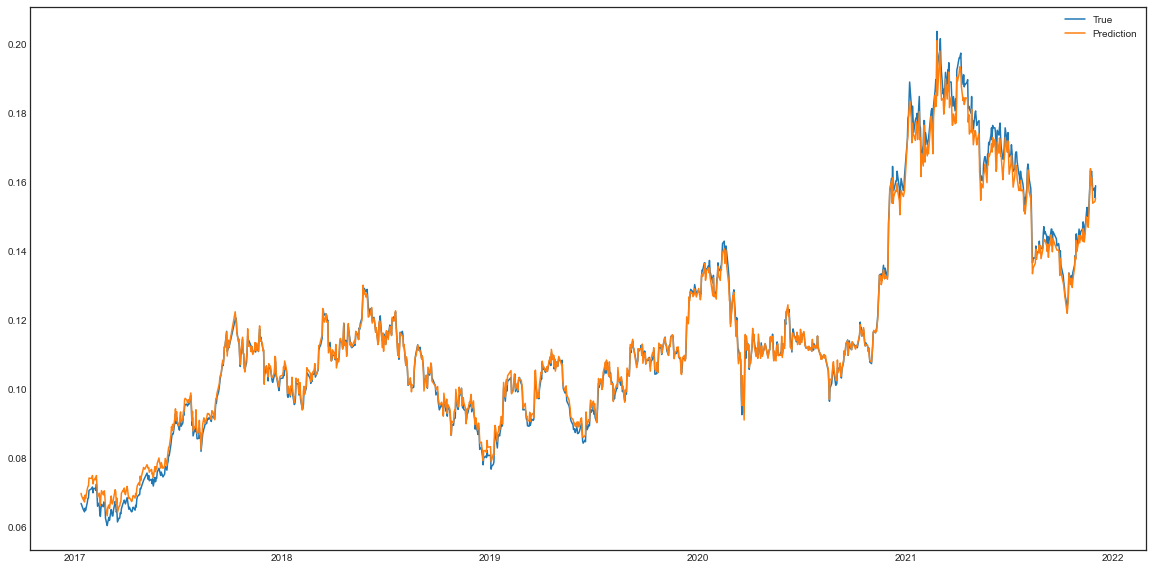

In [61]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(df_sk_scale[4799:].index, y_test, label='True')
ax.plot(df_sk_scale[4799:].index, pred, label='Prediction')
ax.legend()
plt.show()

In [59]:
df_sk_scale[4800:].index

DatetimeIndex(['2017-01-13', '2017-01-16', '2017-01-17', '2017-01-18',
               '2017-01-19', '2017-01-20', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26',
               ...
               '2021-11-18', '2021-11-19', '2021-11-22', '2021-11-23',
               '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-29',
               '2021-11-30', '2021-12-01'],
              dtype='datetime64[ns]', name='Date', length=1199, freq=None)

In [64]:
# Model2

model2 = Sequential()
model2.add(LSTM(50, return_sequences = True, input_shape = (5, 1)))
model2.add(Dropout(0.2))
model2.add(LSTM(64, return_sequences = False))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation = 'linear'))
model2.add(Dense(1, activation = 'linear'))

model2.compile(loss = 'mse',
             optimizer = 'rmsprop',
             metrics = ['mae'])

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 5, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 5, 50)             0         
                                                                 
 lstm_8 (LSTM)               (None, 64)                29440     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 40,501
Trainable params: 40,501
Non-trai

In [65]:
hist2 = model2.fit(x_train, y_train,
                 epochs = 20,
                 batch_size = 10,
                validation_data = (x_test, y_test))

Epoch 1/20
480/480 [==============================] - 5s 8ms/step - loss: 0.0016 - mae: 0.0230 - val_loss: 3.0022e-04 - val_mae: 0.0171
Epoch 2/20
480/480 [==============================] - 4s 8ms/step - loss: 7.3642e-04 - mae: 0.0167 - val_loss: 1.5019e-05 - val_mae: 0.0037
Epoch 3/20
480/480 [==============================] - 4s 8ms/step - loss: 6.0051e-04 - mae: 0.0156 - val_loss: 7.4786e-06 - val_mae: 0.0021
Epoch 4/20
480/480 [==============================] - 3s 7ms/step - loss: 5.2054e-04 - mae: 0.0148 - val_loss: 1.0543e-05 - val_mae: 0.0027
Epoch 5/20
480/480 [==============================] - 3s 7ms/step - loss: 5.1538e-04 - mae: 0.0144 - val_loss: 8.5397e-05 - val_mae: 0.0090
Epoch 6/20
480/480 [==============================] - 3s 7ms/step - loss: 4.8207e-04 - mae: 0.0140 - val_loss: 1.1833e-04 - val_mae: 0.0103
Epoch 7/20
480/480 [==============================] - 4s 8ms/step - loss: 4.4705e-04 - mae: 0.0136 - val_loss: 1.3004e-04 - val_mae: 0.0112
Epoch 8/20
480/480 [====

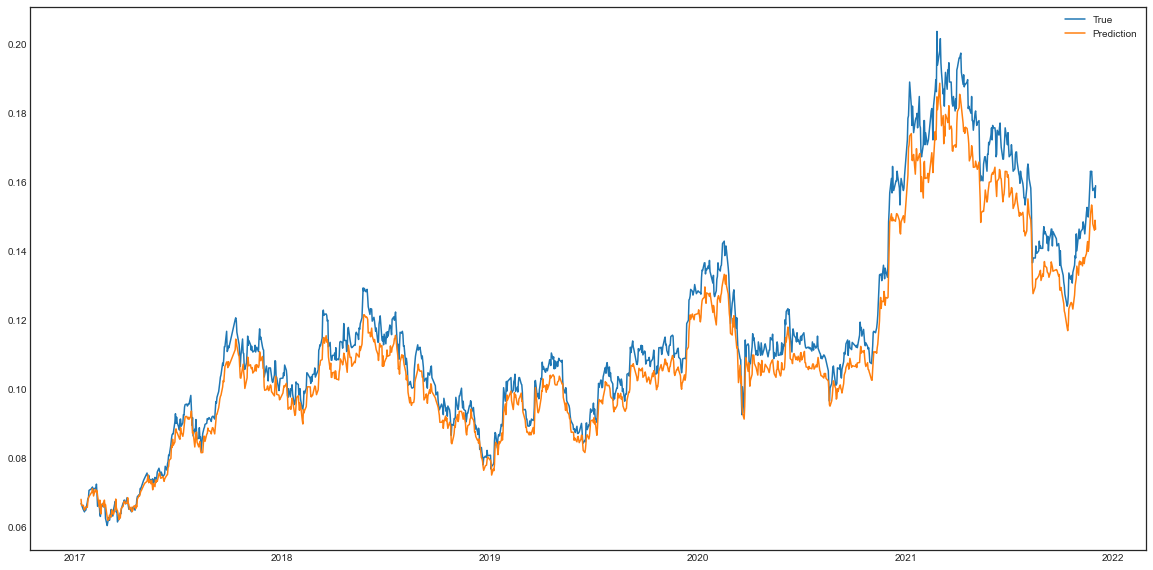

In [66]:
pred2 = model2.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(df_sk_scale[4799:].index, y_test, label='True')
ax.plot(df_sk_scale[4799:].index, pred2, label='Prediction')
ax.legend()
plt.show()